<a href="https://colab.research.google.com/github/gargishita/MachineLearning/blob/main/dp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('Top 2000 Companies Financial Data 2024.csv')
df1.head()

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,$252.9 B,$50 B,"$4,090.7 B",$588.1 B
1,1,Berkshire Hathaway,United States,$369 B,$73.4 B,"$1,070 B",$899.1 B
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$489.1 B,$116.9 B,$661.5 B,"$1,919.3 B"
3,3,ICBC,China,$223.8 B,$50.4 B,"$6,586 B",$215.2 B
4,4,Bank of America,United States,$183.3 B,$25 B,"$3,273.8 B",$307.3 B


In [4]:
df1.shape

(2001, 7)

In [5]:
df1.describe()

,Unnamed: 0
count,2001.000000
mean,1000.000000
std,577.783264
min,0.000000
25%,500.000000
50%,1000.000000
75%,1500.000000
max,2000.000000


In [6]:
def convert_to_billions(value):
    value = value.replace("$", "").replace(",", "").strip()  # Remove $ and commas
    if "B" in value:
        return float(value.replace("B", ""))  # Convert billions directly
    elif "M" in value:
        return float(value.replace("M", "")) / 1000  # Convert millions to billions
    else:
        return float(value)

In [7]:
column_name =np.array(df1.columns)
column_name

array(['Unnamed: 0', 'Name', 'Country', 'Sales', 'Profit', 'Assets',
       'Market Value'], dtype=object)

In [8]:
new_column_names = column_name[3:]
new_column_names

array(['Sales', 'Profit', 'Assets', 'Market Value'], dtype=object)

In [9]:
for x in new_column_names:
    df1[x] = df1[x].apply(convert_to_billions)

In [11]:
df1.head()

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,252.9,50.0,4090.7,588.1
1,1,Berkshire Hathaway,United States,369.0,73.4,1070.0,899.1
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,489.1,116.9,661.5,1919.3
3,3,ICBC,China,223.8,50.4,6586.0,215.2
4,4,Bank of America,United States,183.3,25.0,3273.8,307.3


In [13]:
mean_sales = df1["Sales"].mean()
median_sales = df1["Sales"].median()
mode_sales = df1["Sales"].mode()[0]

print("Mean Sales (in billions):", mean_sales)
print("Median Sales (in billions):", median_sales)
print("Mode Sales (in billions):", mode_sales)

Mean Sales (in billions): 25.838674662668666
Median Sales (in billions): 12.7
Mode Sales (in billions): 6.7


In [16]:
std_sales = df1["Sales"].std()
print("Standard Deviation of Sales (in billions):", std_sales)

Standard Deviation of Sales (in billions): 46.58343879055744


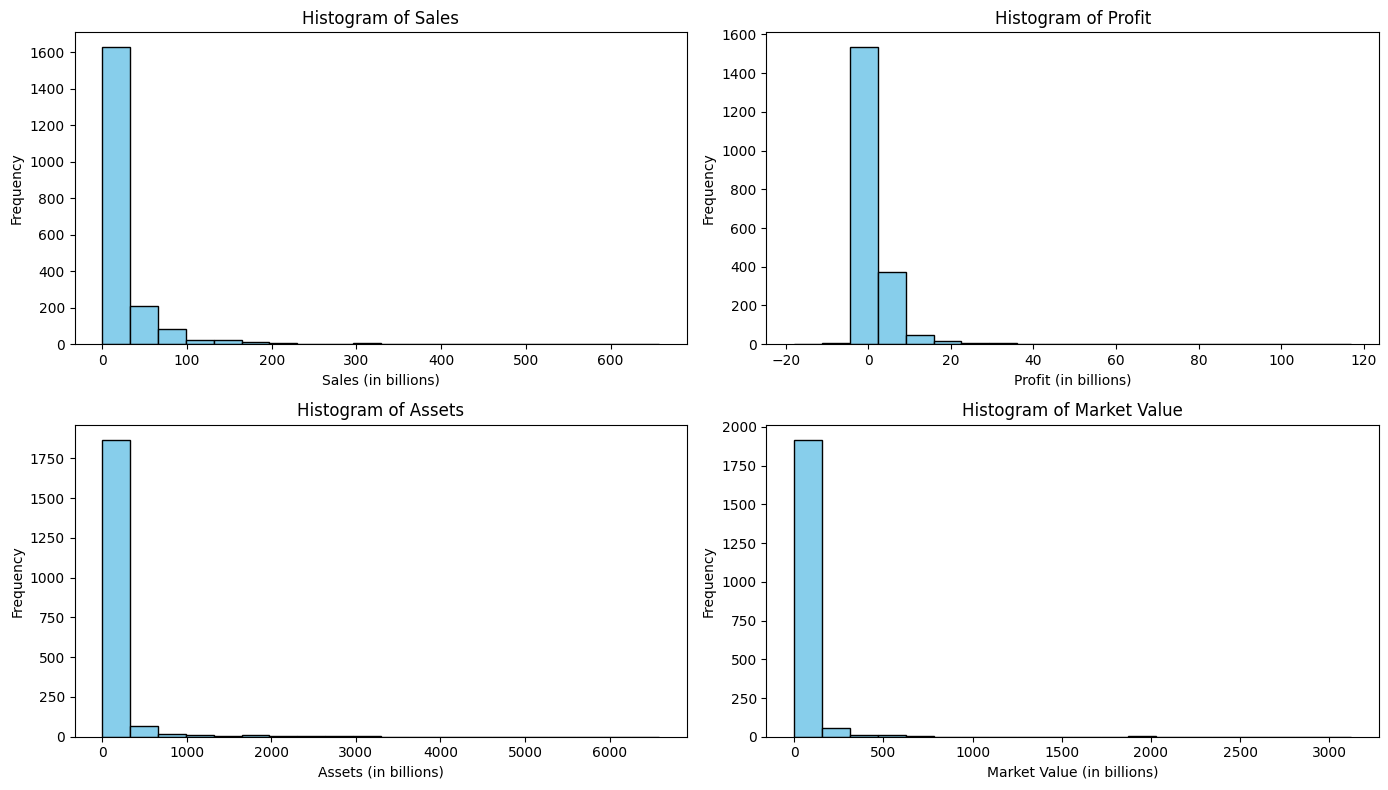

In [22]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(new_column_names, 1):
    plt.subplot(2, 2, i)
    plt.hist(df1[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(f'{column} (in billions)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
correlation_matrix = df1[["Sales", "Profit", "Assets", "Market Value"]].corr()

In [25]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Sales    Profit    Assets  Market Value
Sales         1.000000  0.661865  0.381110      0.517937
Profit        0.661865  1.000000  0.461375      0.808203
Assets        0.381110  0.461375  1.000000      0.140647
Market Value  0.517937  0.808203  0.140647      1.000000


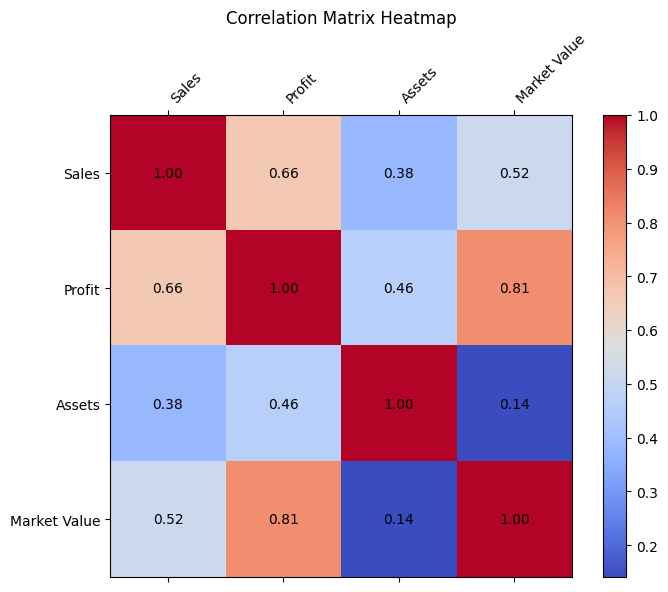

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap manually
cax = ax.matshow(correlation_matrix, cmap="coolwarm")

# Add colorbar
plt.colorbar(cax)

# Set axis ticks
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))

# Set axis labels
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(correlation_matrix.columns)

# Annotate matrix with correlation values
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color="black")

plt.title("Correlation Matrix Heatmap")
plt.show()

In [37]:
def detect_outliers(column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
    return outliers, lower_bound, upper_bound



Column: Sales
Lower Bound: -23.099999999999998, Upper Bound: 54.5
Outliers:
      Unnamed: 0                                      Name        Country  \
0              0                             JPMorganChase  United States   
1              1                        Berkshire Hathaway  United States   
2              2  Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia   
3              3                                      ICBC          China   
4              4                           Bank of America  United States   
...          ...                                       ...            ...   
1067        1067                      Wuchan Zhongda Group          China   
1196        1196                              StoneX Group  United States   
1220        1220                    Performance Food Group  United States   
1287        1287          Xiamen International Trade Group          China   
1340        1340                            Xiamen Xiangyu          China   

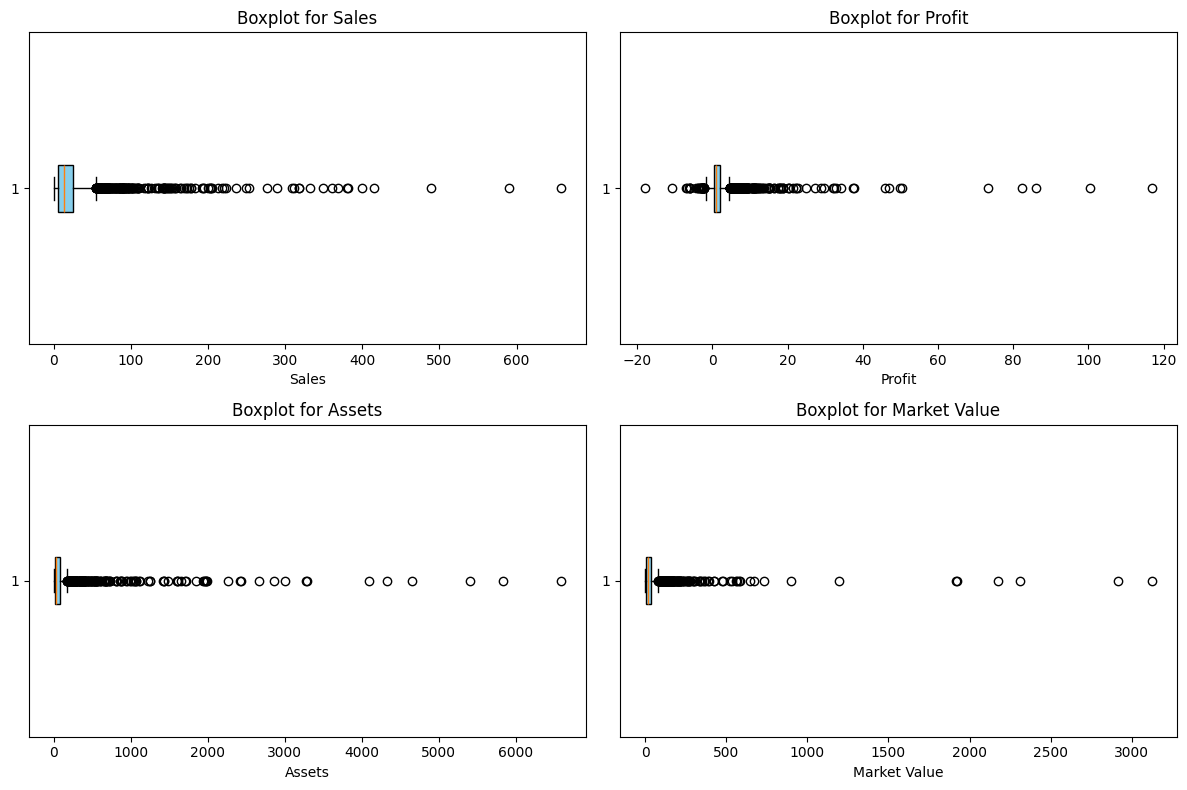

In [38]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(new_column_names, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df1[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)

    # Detect and print outliers
    outliers, lower_bound, upper_bound = detect_outliers(column)
    print(f"\nColumn: {column}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print("Outliers:")
    print(outliers if not outliers.empty else "No outliers found.")

plt.tight_layout()
plt.show()